In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read data from var.csv
df = pd.read_csv('GEFCom2014-S_V2\Solar\Task 1\predictors1.csv')

# Read labels from label.csv
df_label = pd.read_csv('GEFCom2014-S_V2\Solar\Task 1\\train1.csv')

# Convert the `TIMESTAMP` columns in both `df` and `df_label` to datetime format.
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format='%Y%m%d %H:%M')
df_label['TIMESTAMP'] = pd.to_datetime(df_label['TIMESTAMP'], format='%Y%m%d %H:%M')

# Merge `df` and `df_label` based on `ZONEID` and `TIMESTAMP` columns.
merged_df = pd.merge(df, df_label, on=['ZONEID', 'TIMESTAMP'], how='inner')

# Drop `ZONEID` and `TIMESTAMP` columns from the merged DataFrame.
merged_df = merged_df.drop(['ZONEID', 'TIMESTAMP'], axis=1)

# Create feature matrix `X` and target variable `y` by separating the `POWER` column from the rest of the columns.
X = merged_df.drop('POWER', axis=1)
y = merged_df['POWER']

# Split `X` and `y` into training and testing sets with the ratio of 80:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost regressor.
model = XGBRegressor(n_estimators=1000)

# Fit the XGBoost regressor to the training data.
model.fit(X_train, y_train, verbose=True, early_stopping_rounds=50, eval_metric='rmse', eval_set=[(X_test, y_test)])

# Predict the target variable on the testing data.
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metric.
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

[0]	validation_0-rmse:0.21857
[1]	validation_0-rmse:0.17608
[2]	validation_0-rmse:0.14925
[3]	validation_0-rmse:0.13396
[4]	validation_0-rmse:0.12459
[5]	validation_0-rmse:0.11865
[6]	validation_0-rmse:0.11567
[7]	validation_0-rmse:0.11388
[8]	validation_0-rmse:0.11262
[9]	validation_0-rmse:0.11194
[10]	validation_0-rmse:0.11053
[11]	validation_0-rmse:0.10922
[12]	validation_0-rmse:0.10852
[13]	validation_0-rmse:0.10791
[14]	validation_0-rmse:0.10773
[15]	validation_0-rmse:0.10682
[16]	validation_0-rmse:0.10656
[17]	validation_0-rmse:0.10627
[18]	validation_0-rmse:0.10614
[19]	validation_0-rmse:0.10545
[20]	validation_0-rmse:0.10535
[21]	validation_0-rmse:0.10518
[22]	validation_0-rmse:0.10478
[23]	validation_0-rmse:0.10470
[24]	validation_0-rmse:0.10462
[25]	validation_0-rmse:0.10443
[26]	validation_0-rmse:0.10419
[27]	validation_0-rmse:0.10412
[28]	validation_0-rmse:0.10382
[29]	validation_0-rmse:0.10348
[30]	validation_0-rmse:0.10345
[31]	validation_0-rmse:0.10306
[32]	validation_0-

c:\Users\phamt\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\phamt\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-rmse:0.09961
[55]	validation_0-rmse:0.09952
[56]	validation_0-rmse:0.09946
[57]	validation_0-rmse:0.09932
[58]	validation_0-rmse:0.09931
[59]	validation_0-rmse:0.09929
[60]	validation_0-rmse:0.09913
[61]	validation_0-rmse:0.09891
[62]	validation_0-rmse:0.09893
[63]	validation_0-rmse:0.09882
[64]	validation_0-rmse:0.09874
[65]	validation_0-rmse:0.09868
[66]	validation_0-rmse:0.09839
[67]	validation_0-rmse:0.09814
[68]	validation_0-rmse:0.09809
[69]	validation_0-rmse:0.09797
[70]	validation_0-rmse:0.09776
[71]	validation_0-rmse:0.09759
[72]	validation_0-rmse:0.09747
[73]	validation_0-rmse:0.09740
[74]	validation_0-rmse:0.09739
[75]	validation_0-rmse:0.09738
[76]	validation_0-rmse:0.09726
[77]	validation_0-rmse:0.09713
[78]	validation_0-rmse:0.09709
[79]	validation_0-rmse:0.09709
[80]	validation_0-rmse:0.09703
[81]	validation_0-rmse:0.09698
[82]	validation_0-rmse:0.09686
[83]	validation_0-rmse:0.09683
[84]	validation_0-rmse:0.09674
[85]	validation_0-rmse:0.09681
[86]	val

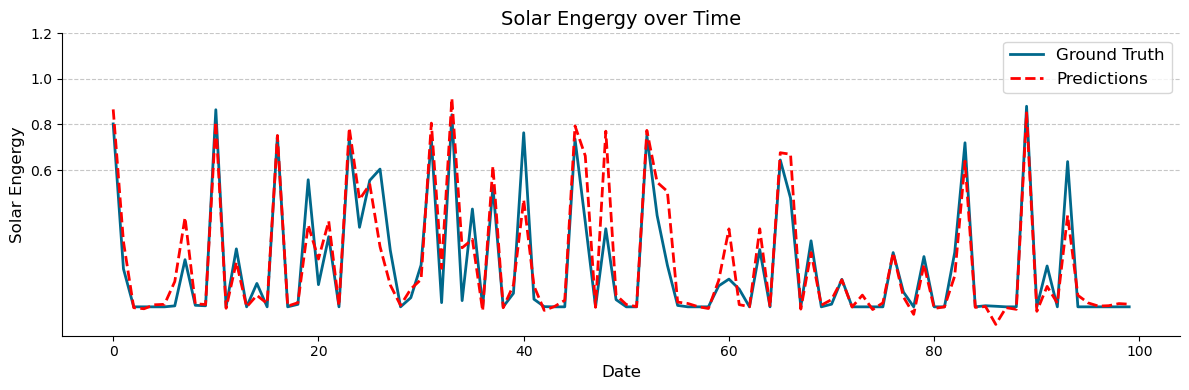

In [3]:
import matplotlib.pyplot as plt
import numpy as np

y_test = y_test[:100]
y_pred = y_pred[:100]
# Assuming y_test and y_pred are your true and predicted values respectively
plt.figure(figsize=(12, 4))  # Adjust the size as needed

# Generate a time axis for plotting
time_index = np.arange(len(y_test))

# Plotting the lines without markers
plt.plot(time_index, y_test.values, color='#00688B', linestyle='-', linewidth=2, label='Ground Truth')
plt.plot(time_index, y_pred, color='red', linestyle='--', linewidth=2, label='Predictions')

# Add plot elements similar to the provided image
plt.xlabel('Date', fontsize=12)
plt.ylabel('Solar Engergy', fontsize=12)
plt.title('Solar Engergy over Time', fontsize=14)

# Customizing ticks and gridlines
plt.xticks(fontsize=10)
plt.yticks([0.6, 0.8, 1.0, 1.2], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only y-axis gridlines

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
